## Customer Preference Data 

In [5]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## Data Exploration

In [6]:
# Read Data
df = pd.read_excel("D:\\FCDS\\Syllabus\\Spring 24-25\\Data Mining\\StoresData.xlsx")
print(df.isnull().sum())  # No Null Values
print(df.duplicated().sum())  # No Duplicated Values

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64
0


In [7]:
df.head()

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171


## Visualizing & Extracting insigts

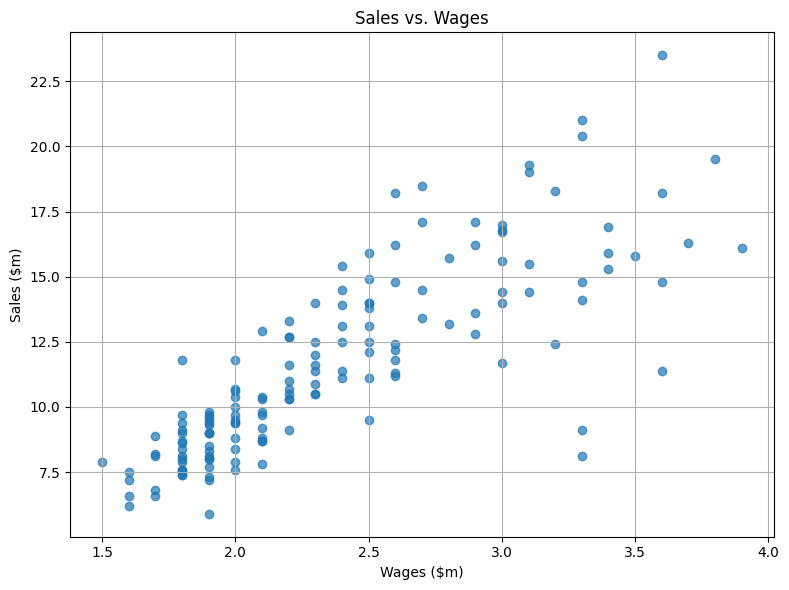

In [8]:


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Wages $m'], df['Sales $m'], alpha=0.7)

plt.title('Sales vs. Wages')
plt.xlabel('Wages ($m)')
plt.ylabel('Sales ($m)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\rahma\AppData\Local\Temp\ipykernel_35476\4206112028.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


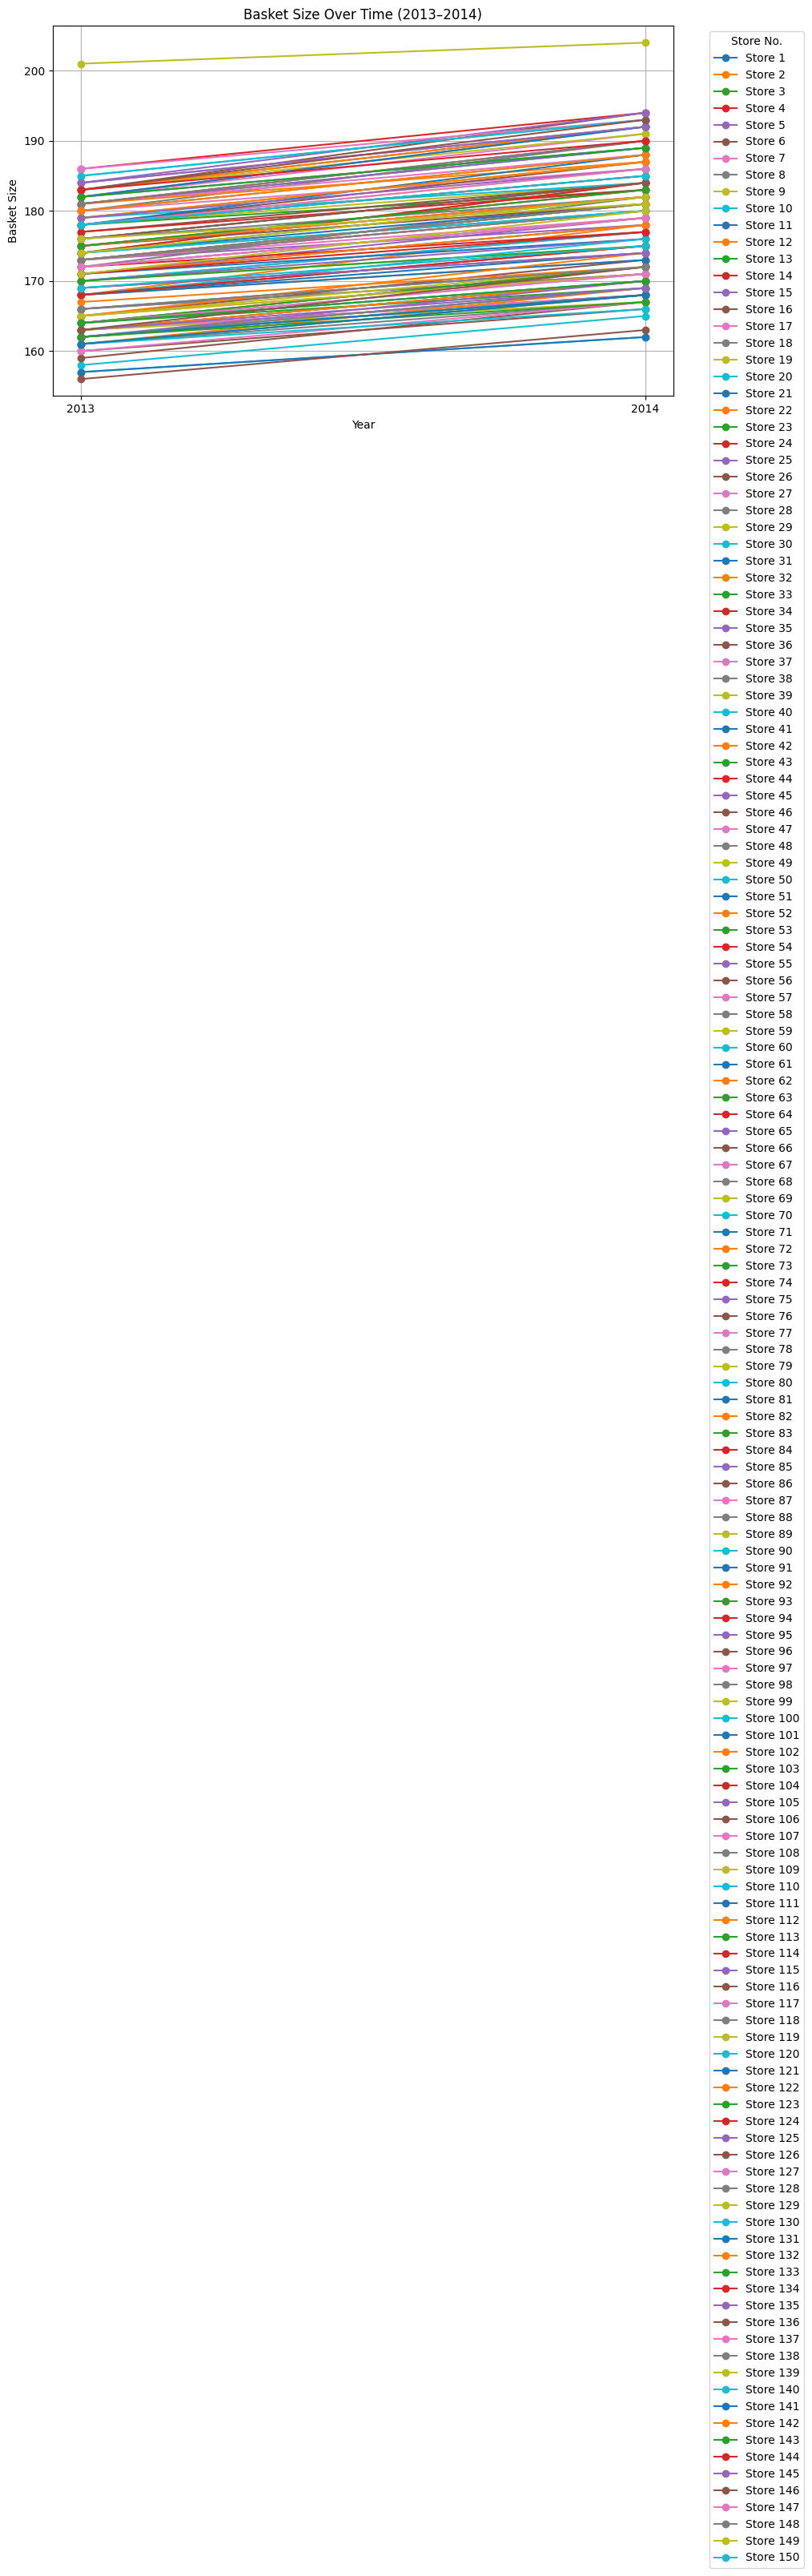

In [9]:


#  reshaping the DataFrame to long format for easier plotting
basket_df = df[['Store No.', 'Basket:2013', 'Basket:2014']].copy()
basket_df = basket_df.set_index('Store No.')

# Transposing the basket columns to make years the x-axis
basket_df = basket_df.T
basket_df.index = ['2013', '2014']  # Rename the index to years

# Plot
plt.figure(figsize=(10, 6))
for store in basket_df.columns:
    plt.plot(basket_df.index, basket_df[store], marker='o', label=f'Store {store}')

plt.title('Basket Size Over Time (2013–2014)')
plt.xlabel('Year')
plt.ylabel('Basket Size')
plt.legend(title='Store No.', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


- Finding correlation to show effect of advertising spending and sales on gross profit


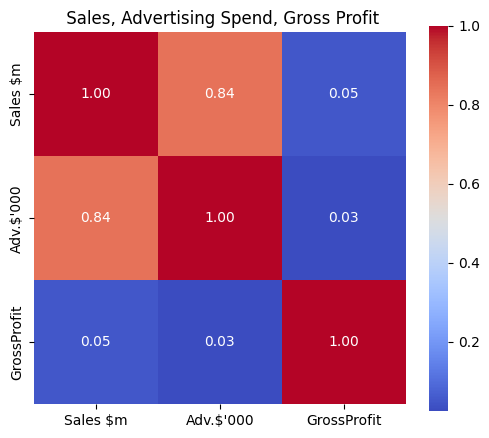

In [10]:
import seaborn as sns

# Select  columns
matrix = df[['Sales $m', "Adv.$'000", 'GrossProfit']]

# Compute correlation matrix
corr_matrix = matrix.corr()

# Plot correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title(' Sales, Advertising Spend, Gross Profit')
plt.show()


C:\Users\rahma\AppData\Local\Temp\ipykernel_35476\202162667.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=locations)


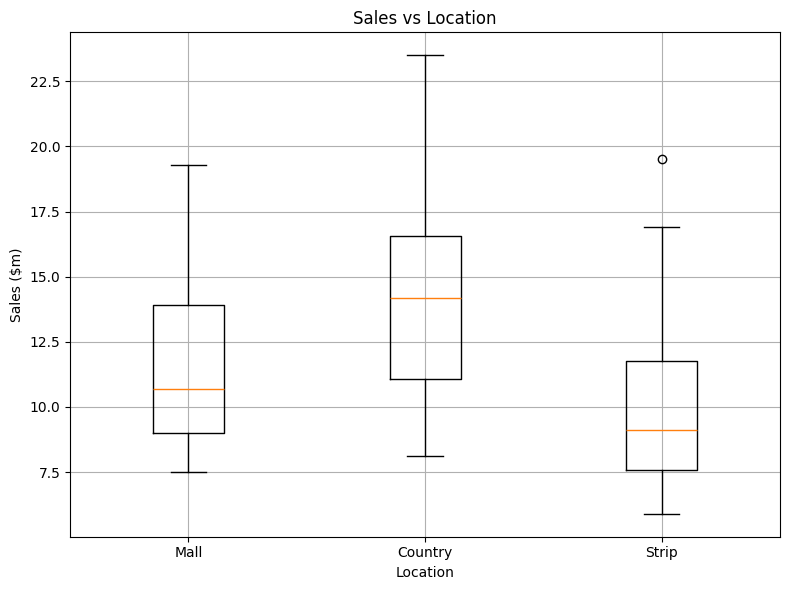

In [11]:


# Group sales data by location
locations = df['Location'].unique()
data_to_plot = [df[df['Location'] == loc]['Sales $m'] for loc in locations]

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=locations)

plt.title('Sales vs Location')
plt.xlabel('Location')
plt.ylabel('Sales ($m)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Preparing Data for Modeling

In [12]:
# Remove outliers
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)  # Identify rows containing outliers
df = df[~outlier_mask]  # Remove rows with outliers
df = df.drop(columns=['State', 'Sundays', 'Mng-Sex', 'HomeDel'])  # Drop already encoded columns
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)  # Split data into training and testing sets
print(train_data.shape)
print(test_data.shape)

(79, 22)
(20, 22)


In [13]:
df.head()

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,1,10,0.712,171,...,0,0,33,12,2,38,46,0,171,178
1,2,14.5,2.7,69,Mall,2,2,8,0.091,213,...,0,0,33,16,1,38,73,0,168,178
2,3,19.0,3.1,79,Country,3,2,7,1.075,255,...,1,0,30,9,2,39,64,0,180,188
3,4,18.2,2.6,66,Mall,2,3,7,1.372,287,...,1,0,29,9,2,38,66,1,173,180
4,5,7.6,2.0,51,Strip,1,3,15,2.148,112,...,1,0,36,4,3,40,29,0,166,171


In [14]:
# Select relevant features for clustering
features = ['Sales $m', 'Wages $m', 'No. Staff', 'Age (Yrs)', 'GrossProfit', 
            'Adv.$\'000', 'Competitors', 'HrsTrading', 'Car Spaces']

In [15]:
# Extract the data
X = df[features]

In [16]:
# Scale the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Applying Algorithms

- K-means Algorithm to find related unlabeled groups

In [17]:
# Calculate K-Means inertia for different numbers of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

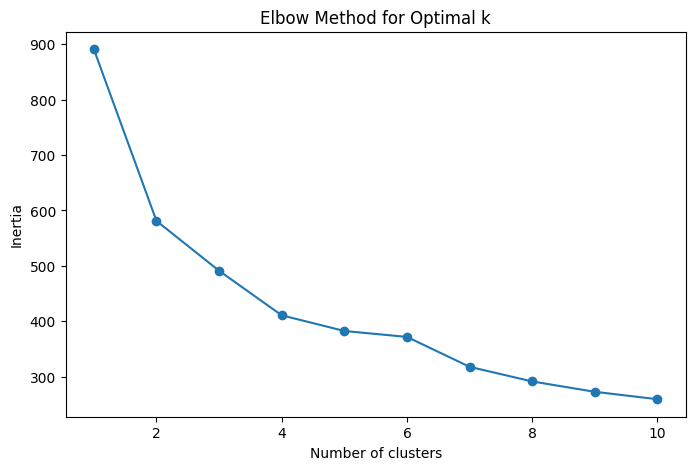

In [18]:
# Plot the Elbow curve to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [20]:
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

In [21]:
# Group statistics by cluster
cluster_stats = df.groupby('Cluster')[features].mean()
print(cluster_stats)

          Sales $m  Wages $m  No. Staff  Age (Yrs)  GrossProfit   Adv.$'000  \
Cluster                                                                       
0         9.496429  1.975000  52.375000   9.571429     0.906661  102.464286   
1        15.590909  2.972727  77.818182  10.000000     0.842364  229.454545   
2        13.921875  2.768750  68.656250   8.656250     1.587250  181.875000   

         Competitors  HrsTrading  Car Spaces  
Cluster                                       
0           2.660714  108.053571   31.053571  
1           4.090909  128.363636   67.818182  
2           0.968750   85.812500   55.937500  


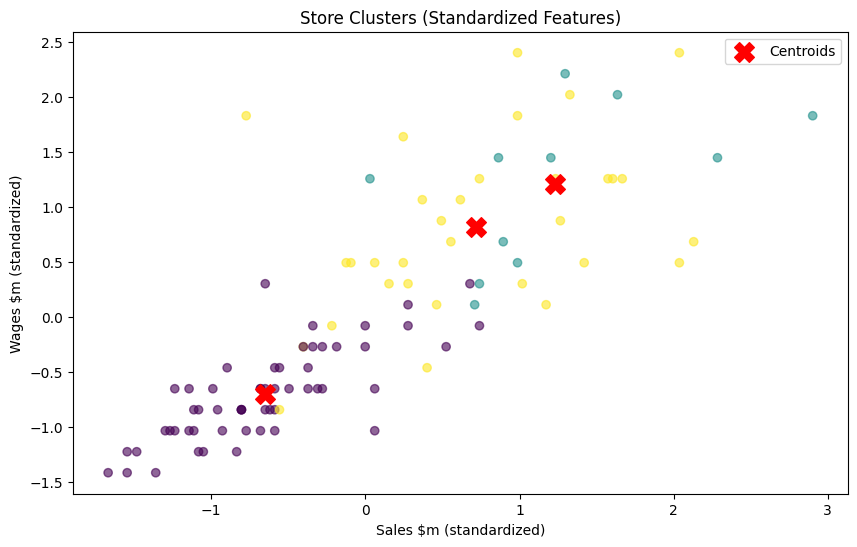

In [22]:
# Visualize the clusters using the first two features for display
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('Store Clusters (Standardized Features)')
plt.xlabel('Sales $m (standardized)')
plt.ylabel('Wages $m (standardized)')
plt.legend()
plt.show()

In [23]:
# Calculate the mean values for each cluster
cluster_means = df.groupby('Cluster')[features].mean()
cluster_sizes = df['Cluster'].value_counts().sort_index()

In [24]:
# Print cluster statistics
print("\nCluster Sizes:")
print(cluster_sizes)
print("\nAverage Values by Cluster:")
print(cluster_means.round(2))


Cluster Sizes:
Cluster
0    56
1    11
2    32
Name: count, dtype: int64

Average Values by Cluster:
         Sales $m  Wages $m  No. Staff  Age (Yrs)  GrossProfit  Adv.$'000  \
Cluster                                                                     
0            9.50      1.98      52.38       9.57         0.91     102.46   
1           15.59      2.97      77.82      10.00         0.84     229.45   
2           13.92      2.77      68.66       8.66         1.59     181.88   

         Competitors  HrsTrading  Car Spaces  
Cluster                                       
0               2.66      108.05       31.05  
1               4.09      128.36       67.82  
2               0.97       85.81       55.94  


- Apriori Algorithm to find frequent sets

In [25]:
# Prepare data for Apriori
def prepare_apriori_data(df):
    # Convert numerical features into categories
    df['Sales_bin'] = pd.cut(df['Sales $m'], 
                            bins=[0, 10, 15, 25], 
                            labels=['Low_Sales', 'Medium_Sales', 'High_Sales'])
    
    df['Staff_bin'] = pd.cut(df['No. Staff'], 
                            bins=[0, 50, 70, 120], 
                            labels=['Small_Staff', 'Medium_Staff', 'Large_Staff'])
    
    df['Age_bin'] = pd.cut(df['Age (Yrs)'], 
                          bins=[0, 5, 10, 25], 
                          labels=['New_Store', 'Middle_Aged', 'Established'])
    
    # Prepare categorical features
    df['Sundays'] = df['Sundays (Num)'].map({0: 'No_Sunday', 1: 'Open_Sunday'})
    df['HomeDel'] = df['HomeDel (Num)'].map({0: 'No_HomeDel', 1: 'Home_Delivery'})
    
    # Map store states
    state_mapping = {1: 'NSW', 2: 'Vic', 3: 'Qld', 4: 'SA',
                     5: 'WA', 6: 'Tas', 7: 'NT', 8: 'ACT'}
    df['State'] = df['State (Num)'].map(state_mapping)
    
    # Select features for the association rules
    features = ['Sales_bin', 'Staff_bin', 'Age_bin', 'Location', 
               'Sundays', 'HomeDel', 'State']
    return df[features]

apriori_df = prepare_apriori_data(df)

In [26]:
# Convert to transaction format
TE = TransactionEncoder()
TE_ary = TE.fit(apriori_df.values).transform(apriori_df.values)
transaction_df = pd.DataFrame(TE_ary, columns=TE.columns_)

NameError: name 'TransactionEncoder' is not defined

In [ ]:
# Find frequent itemsets with minimum support of 0.1
frequent_itemsets = apriori(transaction_df, min_support=0.1, use_colnames=True)
# Sort by support and display top 10
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
print("Top 10 Frequent Itemsets:")
print(frequent_itemsets.head(10))

Top 10 Frequent Itemsets:
      support                    itemsets
12   0.646465                (No_HomeDel)
8    0.626263              (Medium_Staff)
14   0.555556               (Open_Sunday)
13   0.444444                 (No_Sunday)
7    0.434343              (Medium_Sales)
6    0.434343                      (Mall)
5    0.404040                 (Low_Sales)
1    0.383838               (Established)
82   0.363636  (Medium_Staff, No_HomeDel)
100  0.353535   (No_HomeDel, Open_Sunday)


In [ ]:
# Generate association rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [ ]:
# Filter rules by lift and confidence
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.7)]
strong_rules = strong_rules.sort_values('lift', ascending=False)

In [ ]:
# Display top rules
print("\nTop Association Rules:")
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Association Rules:
                               antecedents                consequents  \
46        (No_HomeDel, Open_Sunday, Strip)              (Established)   
48                    (Open_Sunday, Strip)  (No_HomeDel, Established)   
69              (Small_Staff, Open_Sunday)                (Low_Sales)   
51               (No_HomeDel, Small_Staff)                (Low_Sales)   
13                           (Small_Staff)                (Low_Sales)   
45  (No_HomeDel, Open_Sunday, Established)                    (Strip)   
63                      (No_Sunday, Strip)                (Low_Sales)   
41                   (Medium_Staff, Strip)              (Established)   
68                  (Open_Sunday, Country)              (Middle_Aged)   
11                     (No_HomeDel, Strip)              (Established)   

     support  confidence      lift  
46  0.121212    1.000000  2.605263  
48  0.121212    0.705882  2.588235  
69  0.101010    1.000000  2.475000  
51  0.121212    1.000000

- Modeling using Random Forest

In [ ]:
# Classify the data using a Random Forest model
X_cls = df[features]  # Features to be used for classification
y_cls = df['Cluster']  # Target is to classify the clusters

In [ ]:
# Split the data into training and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [ ]:
# Train the classification model using RandomForest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict using the test data
y_pred_cls = clf.predict(X_test_cls)

In [ ]:
# Evaluate the model
print("\nClassification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))


Classification Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.00      0.00      0.00         1
           2       0.71      1.00      0.83         5

    accuracy                           0.90        20
   macro avg       0.57      0.64      0.60        20
weighted avg       0.88      0.90      0.88        20


Confusion Matrix:
 [[13  0  1]
 [ 0  0  1]
 [ 0  0  5]]


c:\Users\Cyber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

- K-medoid clustering

Clusters: [[0, 3, 5, 6, 8, 11, 15, 17, 18, 20, 26, 28, 29, 31, 33, 35, 37, 45, 52, 56, 61, 62, 67, 73], [2, 4, 12, 13, 14, 21, 23, 24, 30, 38, 41, 42, 43, 44, 50, 51, 53, 55, 57, 59, 60, 63, 64, 65, 66, 74, 76, 77], [1, 7, 9, 10, 16, 19, 22, 25, 27, 32, 34, 36, 39, 40, 46, 47, 48, 49, 54, 58, 68, 69, 70, 71, 72, 75, 78]]
Medoids: [11, 42, 46]


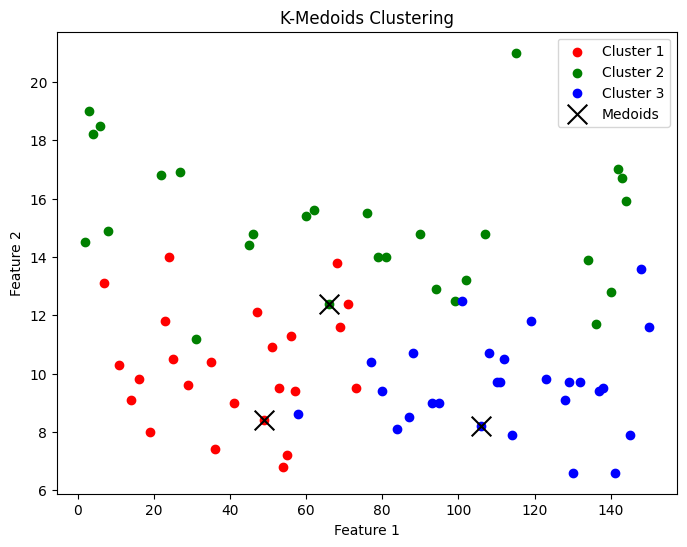

In [31]:
from pyclustering.cluster.kmedoids import kmedoids

from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import calculate_distance_matrix
import matplotlib.pyplot as plt
import numpy as np

initial_medoids = [0, 5, 10] 

train_data = train_data.reset_index(drop=True)

# Select numeric columns 
numeric_train_data = train_data.select_dtypes(include=['number'])

# Calculate distance matrix
distance_matrix = calculate_distance_matrix(numeric_train_data.values) # Use .values for numpy array
# Apply K-Medoids
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

print("Clusters:", clusters)
print("Medoids:", medoids)

# Convert cluster data to numpy for easier plotting
cluster_points = [np.array(numeric_train_data.iloc[cluster].values) for cluster in clusters] 
medoid_points = np.array(numeric_train_data.iloc[medoids].values)

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with a different color
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Adjust if you have more clusters
for i, cluster in enumerate(cluster_points):
    ax.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], label=f'Cluster {i + 1}')

# Plot medoids with a distinct marker
ax.scatter(medoid_points[:, 0], medoid_points[:, 1], marker='x', s=200, c='black', label='Medoids')

# Add labels and legend
ax.set_xlabel("Feature 1")  # Adjust based on your data
ax.set_ylabel("Feature 2")  # Adjust based on your data
ax.legend()

plt.title("K-Medoids Clustering")
plt.show()

## Calculate Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Get labels for each data point (cluster index)
labels = np.zeros(len(numeric_train_data))

for cluster_index, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_index

# Compute Silhouette Score 
sil_score_medoid = silhouette_score(numeric_train_data, labels)

print("Silhouette Score:", sil_score_medoid)


Silhouette Score: 0.2836867687953976
